In [1]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import time
import cv2 as cv2
import pickle

# load the model from disk
classifier1 = pickle.load(open('classifier2.xml', 'rb'))

In [2]:
""" HOG functions """
# Return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        hog_features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  visualize=vis, feature_vector=feature_vec)
        return hog_features, hog_image
    # Otherwise call with one output
    else:      
        hog_features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       visualize=vis, feature_vector=feature_vec)
        return hog_features


In [3]:
# Return extracted features 
def ExtractFeatures(images, orient, pix_per_cell, cell_per_block):
    featureList = []
    for Img in images:
        local_features = get_hog_features(Img, orient, pix_per_cell, cell_per_block, True, True)
        featureList.append(local_features)
    return featureList

In [4]:
# convert RGB image to gray
def convert_Image(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(32,32))
    return img

 # slide a window across the image
def sliding_window(image, stepSize, windowSize):
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
            # generate a windows
            

In [5]:
def Detect_cars(image):
    # covert image to gray
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    winW, winH = 32, 32
    for (x, y, window) in sliding_window(img, stepSize=32, windowSize=(winW, winH)):
        w = x+winW
        h = y+winH
        win = cv2.resize(img[x:w,y:h],(32,32))
        hog_features = get_hog_features(win, 10, 8, 4, False, True)
        predictedOutput=classifier1.predict([hog_features])
        if(predictedOutput==1):
            cv2.rectangle(image, (x, y), (x + winW, y + winH), (0, 255, 0), 1)
        # if the window does not meet our desired window size, ignore it
        #if window.shape[0] != 30 or window.shape[1] != 30:
        
    return image

In [6]:
#PIPLINE 
def pyramid(image):
    size = [640,320,160]
    for Z in size:
        image = cv2.resize(image,(Z,Z))
        image = Detect_cars(image)
    return image
        

(707, 1259, 3)


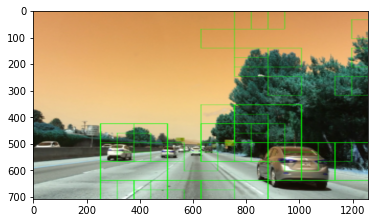

--- 1.1323456764221191 seconds ---


In [7]:
start_time = time.time()
image = cv2.imread("bbox-example-image.jpg")
shape = image.shape
img = pyramid(image)

img = cv2.resize(img,(shape[1],shape[0]))
print(img.shape)
plt.imshow(img)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))